# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=stroke_data.csv

Import the necessary libraries and create your dataframe(s).

BMI is Body Mass Index:
Underweight = <18.5
Normal weight = 18.5–24.9
Overweight = 25–29.9
Obesity = BMI of 30 or greater

According to CDC, A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes.

In [62]:
import pandas as pd
import numpy as np
csv_path = './diabetes_data.csv'
diabetes = pd.read_csv(csv_path)
htn = pd.read_csv('hypertension_data.csv')
stroke = pd.read_csv('stroke_data.csv')

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [63]:
diabetes.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [65]:
diabetes.shape

(70692, 18)

In [66]:
diabetes.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [67]:
# In diabetes dataframe, there no missing value. 

In [68]:
htn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [69]:
htn.shape

(26083, 14)

In [70]:
htn.isnull().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [71]:
for col in htn.columns:
    sex_missing = np.mean(htn[col].isnull())
    print('{} - {}%'.format(col, round(sex_missing*100)))

age - 0%
sex - 0%
cp - 0%
trestbps - 0%
chol - 0%
fbs - 0%
restecg - 0%
thalach - 0%
exang - 0%
oldpeak - 0%
slope - 0%
ca - 0%
thal - 0%
target - 0%


In [72]:
# htn['sex'] = htn['sex'].fillna(htn['sex'].mode()[0])
htn = htn.dropna(axis = 0, subset = 'sex')

In [73]:
htn.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [74]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [75]:
stroke.shape

(40910, 11)

In [76]:
for col in stroke.columns:
    sex1_missing = np.mean(stroke[col].isnull())
    print('{} - {}%'.format(col, round(sex1_missing*100)))

sex - 0%
age - 0%
hypertension - 0%
heart_disease - 0%
ever_married - 0%
work_type - 0%
Residence_type - 0%
avg_glucose_level - 0%
bmi - 0%
smoking_status - 0%
stroke - 0%


In [77]:
stroke = stroke.dropna(axis = 0, subset = 'sex')

In [78]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40907 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40907 non-null  float64
 2   hypertension       40907 non-null  int64  
 3   heart_disease      40907 non-null  int64  
 4   ever_married       40907 non-null  int64  
 5   work_type          40907 non-null  int64  
 6   Residence_type     40907 non-null  int64  
 7   avg_glucose_level  40907 non-null  float64
 8   bmi                40907 non-null  float64
 9   smoking_status     40907 non-null  int64  
 10  stroke             40907 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.7 MB


In [79]:
# Hypertension dataframe is missing less than 1% of values on 'Sex' column, so I replace it with mode 'Sex' value. 
# In Stroke dataframe, only 3 rows were missing 'Sex' value, so I dropped those 3 rows.
stroke.isnull().sum()


sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [80]:
diabetes.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# diabetes.boxplot(column=['BMI'])
sb.set_style('darkgrid')
sb.displot(diabetes.HighChol)

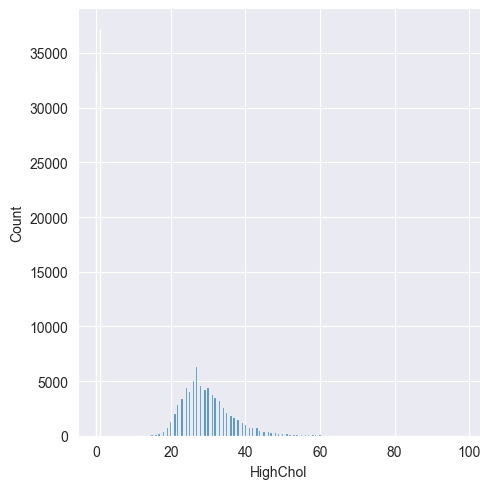

In [82]:
sb.histplot(diabetes['BMI'])
plt.show()


In [83]:
# BMI column has outliers, BMI of 60 and higher which could mean data included several people with weight of 400 - 
# 500lb and over
diabetes.BMI.sort_values(ascending = False)

46214    98.0
612      98.0
45849    98.0
45850    98.0
27801    95.0
         ... 
53890    13.0
23432    13.0
60704    13.0
16653    13.0
5486     12.0
Name: BMI, Length: 70692, dtype: float64

In [84]:
# This code showing that 286 people has BMI of 60 to 98. I will leave the outliers because those could be 
# entered correctly and data collection included morbidly obese people
count = (diabetes['BMI'] >= 60).value_counts()
print(count)
print(count[True])

False    70403
True       289
Name: BMI, dtype: int64
289


In [85]:
htn.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26058.000000,26058.00000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000
mean,55.655730,0.50000,0.956635,131.590682,246.286591,0.149896,0.526057,149.643181,0.326886,1.039742,1.399724,0.720623,2.319057,0.547778
std,15.190407,0.50001,1.022467,17.597086,51.651701,0.356977,0.525688,22.865871,0.469084,1.165673,0.616529,1.011317,0.604868,0.497722
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [86]:
stroke.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000
mean,0.555162,51.327303,0.213851,0.127729,0.821326,3.461095,0.514851,122.079679,30.406488,0.488572,0.500159
std,0.496954,21.624171,0.410028,0.333792,0.383083,0.780934,0.499786,57.561951,6.835305,0.499875,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [87]:
# Trying to how if smoking relates to Stroke presence
corr = diabetes.loc[diabetes['Stroke'] == 1, 'Stroke'].corr(diabetes.loc[diabetes['Stroke'] == 1, 'Smoker'])
corr
# There is no correlation

nan

In [88]:
diabetes.groupby('Stroke')['Smoker'].count()

Stroke
0.0    66297
1.0     4395
Name: Smoker, dtype: int64

In [89]:
# Checking to see if a person who smokes has higher occurance of stroke
new_diabetes = diabetes[diabetes['Smoker'] == 1]
new_diabetes.groupby('Stroke')['Smoker'].count()

Stroke
0.0    30958
1.0     2640
Name: Smoker, dtype: int64

In [90]:
new_stroke = stroke[stroke['smoking_status'] == 1]
new_stroke.groupby('stroke')['smoking_status'].count()

stroke
0     9290
1    10696
Name: smoking_status, dtype: int64

In [91]:
# When looking at diabetes table, smokers number is very low (not related to stroke), but in stroke table, little 
# over than half of the people smoke. For now, I will keep the smoker column on both tables. 

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [92]:
# Trying to standartize column names accross the dataframes and change some column names to make it more 
# understandable
stroke.columns

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [93]:
stroke.rename(columns={'sex': 'Sex', 'age': 'Age', 'hypertension': 'Hypertension', 'heart_disease': 'Heart_Disease', 'ever_married': 'Ever_Married', 'work_type': 'Work_Type', 'avg_glucose_level':'Avg_Glucose_Level', 'bmi': 'BMI', 'smoking_status': 'Smoker', 'stroke':'Stroke'}, inplace = True)


In [94]:
stroke.head()

,Sex,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_type,Avg_Glucose_Level,BMI,Smoker,Stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [95]:
diabetes.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [96]:
diabetes.rename(columns={'Age':'Age_Group'}, inplace=True) 

In [97]:
htn.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [98]:
htn.rename(columns={'age': 'Age', 'sex': 'Sex', 'cp': 'Chest_Pain', 'trestbps': 'Rest_BP', 'chol': 'Chol', 'fbs': 'Fast_Blood_Sugar', 'restecg': 'Rest_ECG', 'thalach': 'Max_HeartRate',
       'exang': 'ExAng', 'oldpeak': 'OldPeak', 'slope': 'Slope', 'ca': 'CA', 'thal': 'Thalassemia', 'target':'Hypertension'}, inplace=True)

In [99]:
htn.columns

Index(['Age', 'Sex', 'Chest_Pain', 'Rest_BP', 'Chol', 'Fast_Blood_Sugar',
       'Rest_ECG', 'Max_HeartRate', 'ExAng', 'OldPeak', 'Slope', 'CA',
       'Thalassemia', 'Hypertension'],
      dtype='object')

In [100]:
htn.Age.sort_values()

16361    11.0
13091    12.0
14689    12.0
19444    13.0
19277    13.0
         ... 
21279    97.0
22022    97.0
21116    97.0
21303    98.0
21707    98.0
Name: Age, Length: 26058, dtype: float64

In [101]:
bins = [18, 24, 30, 34, 40, 44, 50, 54, 60, 64, 70, 74, 80, 100]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
htn['Age_Group'] = pd.cut(x = htn['Age'], bins = bins, labels = labels, include_lowest = True)

In [102]:
htn.head(20)

,Age,Sex,Chest_Pain,Rest_BP,Chol,Fast_Blood_Sugar,Rest_ECG,Max_HeartRate,ExAng,OldPeak,Slope,CA,Thalassemia,Hypertension,Age_Group
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1,8
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1,9
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1,7
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1,8
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1,10
5,51.0,1.0,0,140,192,0,1,148,0,0.4,1,0,1,1,7
6,42.0,0.0,1,140,294,0,0,153,0,1.3,1,0,2,1,5
7,38.0,0.0,1,120,263,0,1,173,0,0.0,2,0,3,1,4
8,72.0,0.0,2,172,199,1,1,162,0,0.5,2,0,3,1,11
9,47.0,0.0,2,150,168,0,1,174,0,1.6,2,0,2,1,6


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? I find only missing values.
2. Did the process of cleaning your data give you new insights into your dataset? Yes, it did. I started to see inconsistency with correlation of smoking status with stroke occurrence across two dataframe.
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations? I need to standardize age column across all of datasets and manage negative age values in age column in Stroke dataset

In [107]:
diabetes.to_csv("diabetes.csv", index=False)

In [108]:
stroke.to_csv("stroke.csv", index=False)

In [109]:
stroke['Stroke'].value_counts()

1    20460
0    20447
Name: Stroke, dtype: int64

In [110]:
count_negative_age = len(stroke[stroke['Age'] < 0])
print("Number of rows with negative age values:", count_negative_age)

Number of rows with negative age values: 58


In [111]:
stroke = stroke[stroke['Age'] >= 0]


In [113]:
age_group = stroke.sort_values(by='Age', ascending=True)
age_group.head(30)

,Sex,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_type,Avg_Glucose_Level,BMI,Smoker,Stroke
15062,0.0,0.0,1,0,0,3,1,79.79,29.7,0,1
14939,1.0,0.0,1,1,1,4,0,70.09,27.4,0,1
9873,1.0,0.0,0,0,1,4,1,97.43,26.4,1,1
13673,0.0,0.0,0,0,1,2,0,190.32,31.4,0,1
15160,0.0,0.0,0,0,1,4,1,110.85,24.1,1,1
12124,1.0,0.0,0,0,1,3,1,70.94,34.4,0,1
14964,1.0,0.0,0,0,1,4,0,228.56,27.4,0,1
13919,1.0,0.0,1,1,1,4,1,112.24,37.4,1,1
9557,1.0,0.0,0,0,1,4,1,186.21,29.0,1,1
9530,1.0,0.0,0,0,1,4,0,80.13,23.4,0,1


In [114]:
bins = [0, 18, 24, 30, 34, 40, 44, 50, 54, 60, 64, 70, 74, 80, 100]
labels = ['0-18', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
stroke['Age_Group'] = pd.cut(x = stroke['Age'], bins = bins, labels = labels, include_lowest = True)

In [115]:
stroke.head(20)

,Sex,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_type,Avg_Glucose_Level,BMI,Smoker,Stroke,Age_Group
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1,9
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1,5
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1,9
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1,5
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1,13
5,1.0,55.0,1,1,1,4,0,70.09,27.4,0,1,8
6,0.0,82.0,0,0,0,4,1,94.39,22.8,0,1,13
7,0.0,17.0,1,0,1,4,0,80.43,29.7,0,1,0-18
8,1.0,31.0,0,1,1,2,0,120.46,36.8,1,1,3
9,0.0,55.0,0,0,1,4,1,104.51,27.3,1,1,8


In [116]:
stroke.to_csv("stroke.csv", index=False)

In [117]:
htn.to_csv("htn.csv", index=False)